<a href="https://colab.research.google.com/github/Anali24/SIMULACION-I/blob/main/Buffon_SI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Experimento de Buffon***


*Sol. Analítica:*


**El experimento de Buffon consiste en lo siguiente:**

Supongamos que hay un "mallado", donde están espaciadas entre ellas a una distancia d, lanzamos sobre ese mallado una aguja de tamaño y verificamos si toca o cruza nuestras lineas .

Así, yo lanzo N agujas y me pregunto cuántas de esas N tocan o cruzaron el mallado  
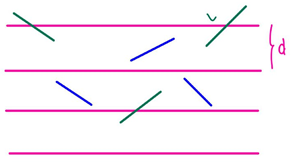

*¿Cómo estimamos pi?*

Nos concentramos en una aguja, que atraviesa el mallado de la siguiente forma:

Notemos que tetha el ángulo entre ellos y x se mide desde el centro hasta la línea más cercana, así notemos que tenemos 3 v.a

1) $ 0 \leq  x \leq \frac{d}{2}$

2) $ 0 \leq   θ\leq  \frac{π}{2}$

Así nos preguntamos cuando  $ x \leq \frac{L}{2 } sin θ$
que es cuando el caso donde la aguja este tocando una línea con la mayor la distancia, es decir la altura.

**Condición de Cruce:** La aguja tocará una línea si la distancia
  $ x \leq \frac{L}{2 } sin θ $

Esta es la condición que debe cumplirse para que la aguja cruce una de las líneas.

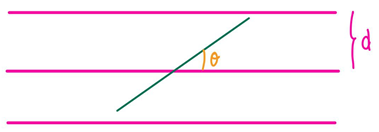



Lo anterior de forma gráfica tenemos:

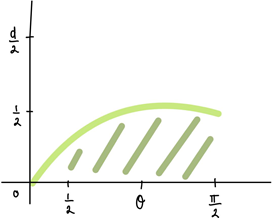

Donde todos los valores que satisfacen mi desigualdad , son los que están por debajo de la curva del medio circulo, entonces:



$ $

**Cálculo de la Probabilidad**

La probabilidad total de que la aguja cruce una línea se obtiene integrando sobre todas las posibles posiciones y ángulos:

$
P = \frac{1}{\left(\frac{D}{2}\right) \cdot \left(\frac{\pi}{2}\right)} \int_{0}^{\frac{D}{2}} \int_{0}^{\frac{\pi}{2}} H\left(\frac{L}{2} \sin(\theta) - x\right) \, d\theta \, dx
$


donde $H$ es la función Heaviside que es 1 cuando su argumento es positivo y 0 en caso contrario.

Resolviendo la Integral:

$
P = \frac{2}{\pi D} \int_{0}^{\frac{D}{2}} \int_{0}^{\frac{\pi}{2}} H\left(\frac{L}{2} \sin(\theta) - x\right) \, d\theta \, dx
$



La integral interna se evalúa considerando que $\frac{L}{2} \sin(\theta) \geq x$:

$
P = \frac{2}{\pi D} \int_{0}^{\frac{D}{2}} \int_{0}^{\sin^{-1} \left(\frac{2x}{L}\right)} 1 \, d\theta \, dx
$

Evaluando la integral:

$
P = \frac{2}{\pi D} \int_{0}^{\frac{D}{2}} \sin^{-1} \left(\frac{2x}{L}\right) \, dx
$

Con el cambio de variable $u = \frac{2x}{L}$, la integral se puede resolver y se obtiene:

$
P = \frac{2L}{\pi D}
$

Esta probabilidad $P$ se puede usar para estimar $\pi$ realizando un experimento y observando cuántas veces la aguja cruza una línea:

**Estimación de $\pi$**

Si se lanza la aguja $N$ veces y se observa que cruza una línea $s$ veces, entonces la probabilidad observada es $\frac{s}{N}$. Usando la fórmula de la probabilidad y considerando $ D= 2 , L= 1$

$
P \approx \frac{1}{\pi}
$



Entonces al hacer este experimento obtengo que la prob de estimar pi es:

$
P \approx \frac{1}{\pi}
$




*Simulación:*

In [144]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [145]:
#Definimos una función, donde esta nos regresa las veces que la aguja toca

def estimacion(N=1000000):
    suma = 0
    x = np.random.uniform(0, 1, N)  # Generamos N valores de x entre 0 y 1
    theta = (1/2) * np.pi * np.random.uniform(0, 1, N)  # Generamos N valores de theta entre 0 y π/2

    for i in range(N):
        if x[i] < 0.5 * np.sin(theta[i]):
            suma += 1

    return N / suma #Queremos estimar pi, y es la inverso de suma/ N


In [146]:
# Llamada a la función
resultado = estimacion()
print("Estimación de pi : ", resultado)

Estimación de pi :  3.142835591984512


Ahora guardamos los Resultados en una lista para generar un Histograma y las otras gráficas correspondientes.

Ahora con ayuda del Teorema del Límite Central, que nos dice que al hacer el experimento muchas veces, nuestro algoritmo, se va a comportar como una Gaussiana en el inifinito.

In [147]:
N=1000
repeticiones= 1000 #Nos dice que cada 1 experimento (N), este lo repetirá 1000
p = [] # Listas para guardar los resultados



In [148]:
# Bucle para realizar las estimaciones
for i in range(1,repeticiones):
    p.append(estimacion(N))  # Estimación de Pi

Histograma:

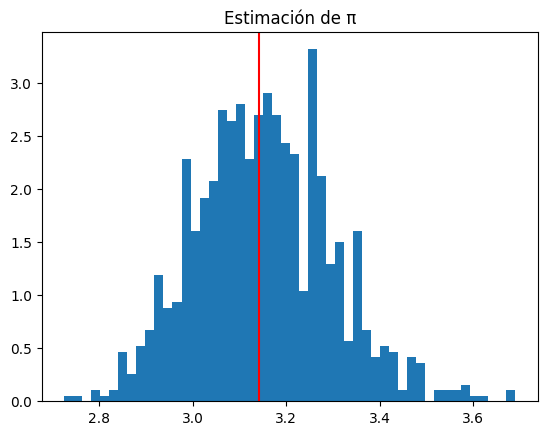

In [149]:
# Graficar del histograma
plt.hist(p, bins = 50 , density= True)
plt.axvline(np.pi , color ='r')
plt.title('Estimación de π')
plt.show()

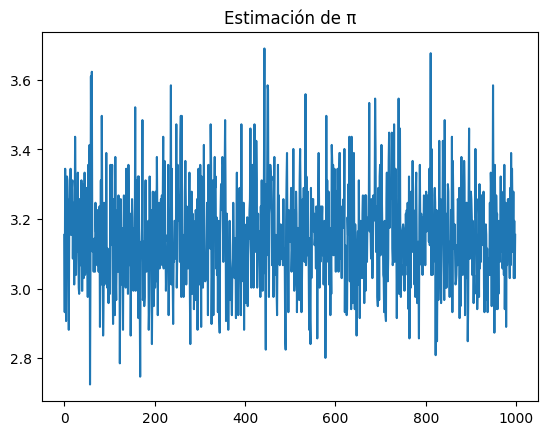

In [150]:
# Graficar la probabilidad
plt.plot(p)
plt.title('Estimación de π')
plt.show()

Si calculamos el promedio o sea la media $\mu$ será más seguro obtener un mejor resultado, ya que hacemos el promedio de todas las estimaciones que dió cerca o se pasaba de pi

In [151]:
media = np.mean(p)
print(f"Media : {media}")

Media : 3.151234187924584


Calculamos la Desviación para dar una respuesta estadística.

In [152]:
desviacion = np.std(p)
print(f"Desviación Estándar : {desviacion}")

Desviación Estándar : 0.14606926101090437


Ahora con la desviación sabemos que el error está dado por:

$\mu \pm \sigma $

In [153]:
errorsuma= media  + desviacion
errorresta = media  - desviacion

print("Pi es un número que está entre " ,errorresta , "y" ,errorsuma  )



Pi es un número que está entre  3.0051649269136798 y 3.297303448935488
